# Qrated analytics - Nov 2022

### Insert the link to your Google Sheet

For example, `https://docs.google.com/spreadsheets/d/1ih4V4CumuIl5ZynobsazNzGiaPrE2V2Dpt13FI22XNU/edit`. Note: the Google Sheet must be publicly accessible such that anyone with a link can read it.

In [1]:
URL = 'https://docs.google.com/spreadsheets/d/1-nYUOmRDEEpC3tk6LSEsodIWgNcTbg0bUjCYFeLBv5A/edit#gid=0'

### Using pandas to create dataframe

In [2]:
import pandas as pd
import re

# This function will convert the url to a download link
def convert_gsheets_url(u):
    try:
        worksheet_id = u.split('#gid=')[1]
    except:
        # Couldn't get worksheet id. Ignore it
        worksheet_id = None
    u = re.findall('https://docs.google.com/spreadsheets/d/.*?/',u)[0]
    u += 'export'
    u += '?format=csv'
    if worksheet_id:
        u += '&gid={}'.format(worksheet_id)
    return u

In [3]:
sample_url = 'https://docs.google.com/spreadsheets/d/1ih4V4CumuIl5ZynobsazNzGiaPrE2V2Dpt13FI22XNU/edit'
try:
    url = convert_gsheets_url(URL)
    df = pd.read_csv(url)
    print('Read successfully')
except:
    print(f"Could not read any data from the URL you provided.\nReading from {sample_url} instead.")
    url = convert_gsheets_url(sample_url)
    df = pd.read_csv(url)

Read successfully


Here is a sample of the data we were able to find:

In [4]:
df.head(100)

,Date,#of users,Total upvotes,Total downvotes,Most popular article title,Most popular article upvote count,Most unpopular article title,Most upopular article downvote count,Most popular category,Most commented article title,Most commented article description,List of comments,Trending # Up,Economy# Up,Env # up,Society # up,Trending # Down,Economy # Down,Env # Down,Society # Down
0,Nov 22 2022,12.0,13.0,3.0,"""He sold himself to the devil - Messi 2030 and...",3.0,NaN,1 ( 3 articles ),Trending,"""He sold himself to the devil - Messi 2030 and...",NaN,RIP argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,"Elon Musk says Twitter Blue relaunch delayed, ...",3.0,NaN,NaN,NaN,"""""",NaN,"""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nov 23 2022,12.0,6.0,12.0,"""""",0.0,"Workers protest, beaten at virus hit Chinese I...",2,Trending,"""""",NaN,"""""",6.0,0.0,0.0,0.0,9.0,1.0,1.0,1.0
3,NaN,NaN,NaN,NaN,"""""",0.0,FTX: How Sam Bankman-Fried built a house of cards,2,NaN,"""""",NaN,"""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nov 25 2022,12.0,4.0,6.0,Good Samaritan and NYPD officers rescue man fr...,1.0,Donald Trump dines with white nationalist Nick...,1,Trending,Donald Trump dines with white nationalist Nick...,NaN,Really...,2.0,2.0,0.0,0.0,3.0,1.0,2.0,1.0
5,NaN,NaN,NaN,NaN,"""""",NaN,Apple has a huge problem with its supplier's i...,0,Economy,Apple has a huge problem with its supplier's i...,NaN,Terrible conditions for workers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,"""""",0.0,"""""",0,Trending,"The short life of baby Serhii, killed in a Ukr...",NaN,"How terrible. The price of war.""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Nov 27 2022,12.0,6.0,6.0,"""""",0.0,"""""",0,"""""","""""",NaN,"""""",4.0,1.0,1.0,0.0,3.0,3.0,0.0,0.0
8,"Nov 28, 2022",12.0,6.0,12.0,FTX founder Sam Bankman - Fried on hot seat as...,1.0,Ukraine told it must prepare for new Russian a...,3,Trending,Ukraine told it must prepare for new Russian a...,NaN,So terrible for the people\n\nSuper cool,0.0,3.0,3.0,0.0,7.0,3.0,2.0,0.0
9,"Nov 29, 2022",12.0,12.0,5.0,China Covid: Police clamp down after days of p...,NaN,Sam Bankman-Fried gave cash to liberal media o...,1,Environment,China Covid: Police clamp down after days of p...,FTX founder Sam Bankman-Fried is facing an ons...,Trust FOX News to make this political,4.0,1.0,4.0,3.0,1.0,1.0,2.0,1.0


In [5]:
print(df.head(10).keys())
comments = df.head(10)['List of comments'].dropna()
issues = df.head(10)['Most commented article title'].dropna()

Index(['Date ', '#of users', 'Total upvotes', 'Total downvotes ',
       'Most popular article title', 'Most popular article upvote count',
       'Most unpopular article title', 'Most upopular article downvote count',
       'Most popular category', 'Most commented article title',
       'Most commented article description', 'List of comments',
       'Trending # Up', 'Economy# Up', 'Env # up', 'Society # up',
       'Trending # Down', 'Economy # Down', 'Env # Down', 'Society # Down'],
      dtype='object')


### Comments wordcloud

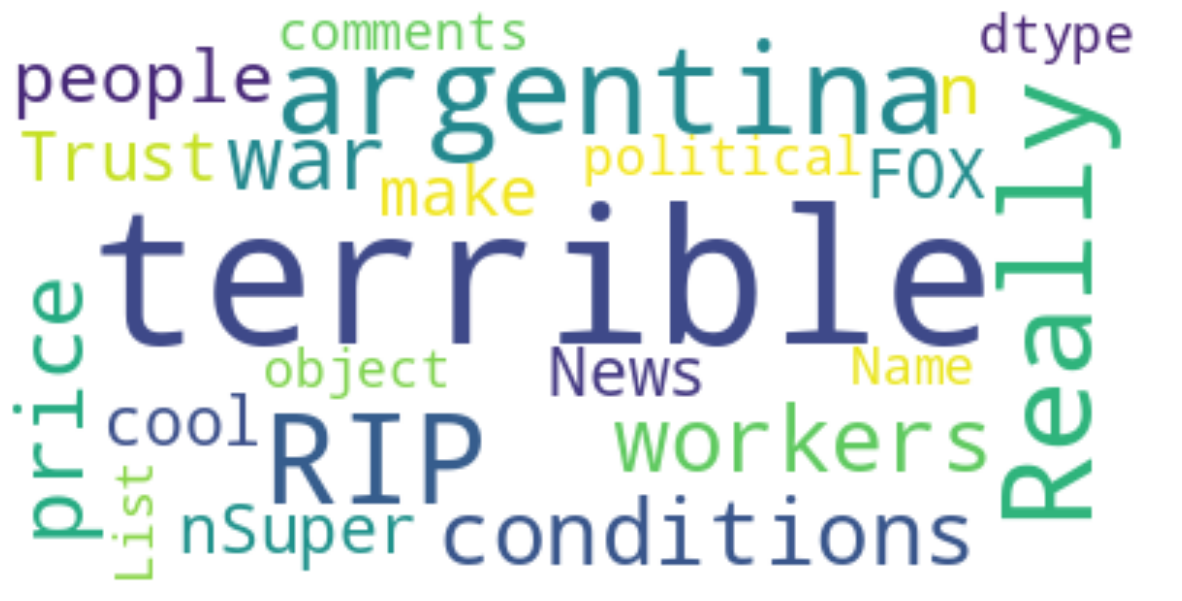

In [6]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

#Comments wordcloud 
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(comments))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Popular issues wordcloud

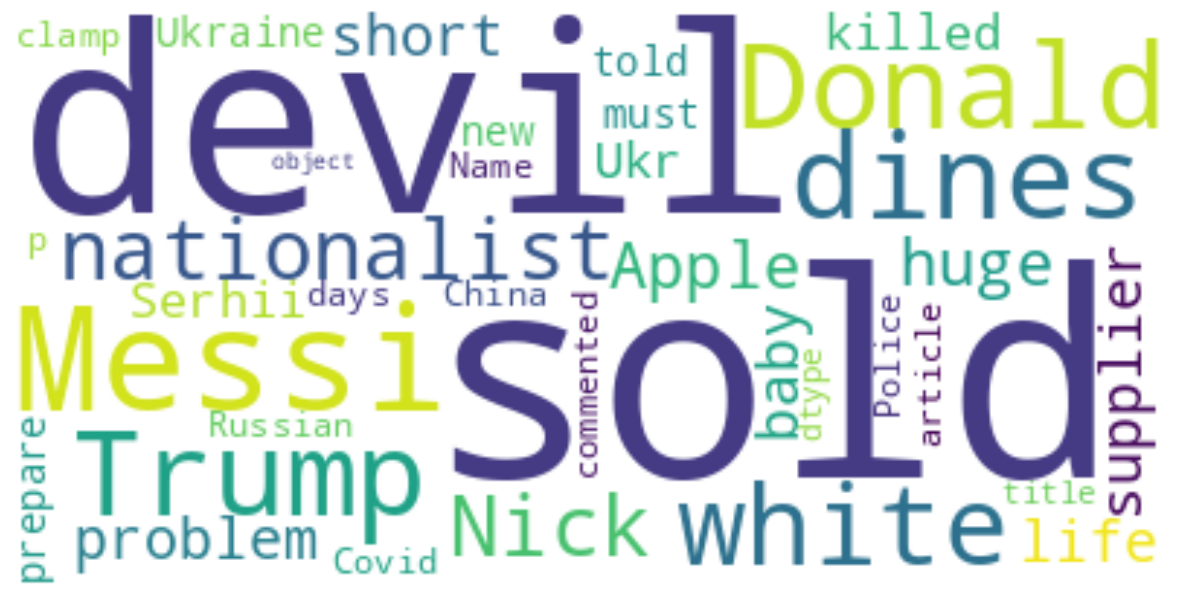

In [11]:
#Issues wordcloud 
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(issues))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Upvote / Downvote trends by category

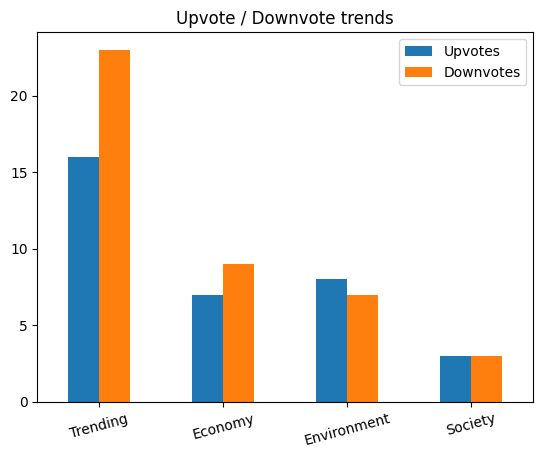

In [8]:
#Upvote/Downvote trends

trd_up = df.head(10)['Trending # Up'].dropna()
eco_up = df.head(10)['Economy# Up'].dropna()
env_up = df.head(10)['Env # up'].dropna()
soc_up = df.head(10)['Society # up'].dropna()
trd_down = df.head(10)['Trending # Down'].dropna()
eco_down = df.head(10)['Economy # Down'].dropna()
env_down = df.head(10)['Env # Down'].dropna()
soc_down = df.head(10)['Society # Down'].dropna()


# A python dictionary

vote_data = {"Upvotes":[sum(trd_up),sum(eco_up),sum(env_up),sum(soc_up)],

        "Downvotes":[sum(trd_down),sum(eco_down),sum(env_down),sum(soc_down)]

        };

vote_index     = ["Trending", "Economy", "Environment", "Society"];

 

# Dictionary loaded into a DataFrame       

vote_dataFrame = pd.DataFrame(data=vote_data, index=vote_index);

# Draw a vertical bar chart

vote_dataFrame.plot.bar(rot=15, title="Upvote / Downvote trends");

plt.show(block=True);

### Sentiment analysis of Description of most commented articles

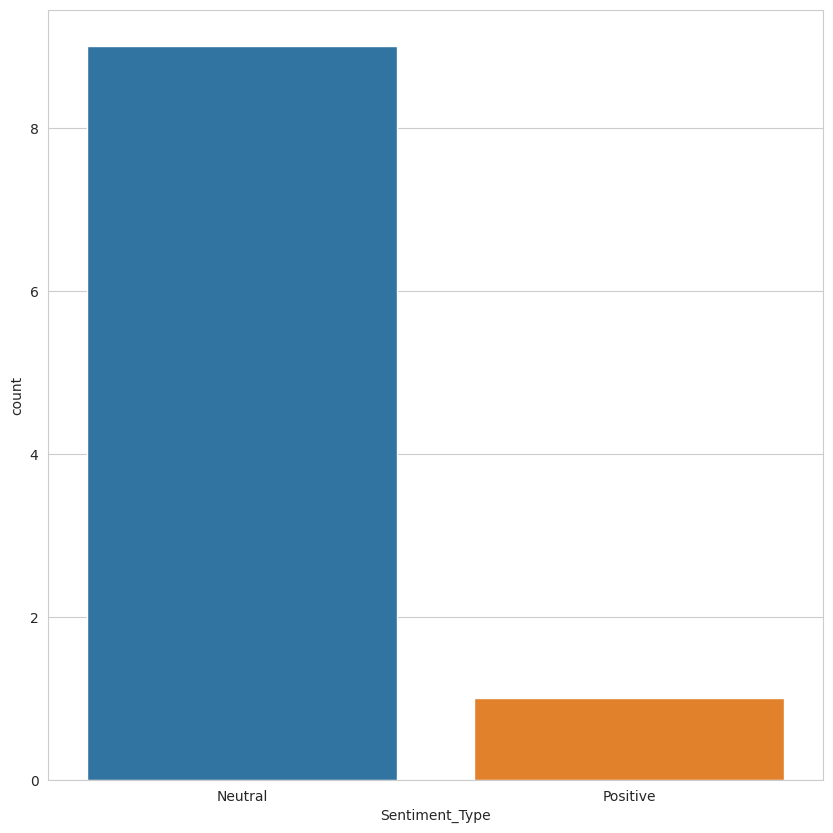

In [9]:
from textblob import TextBlob
import seaborn as sns

bloblist_desc = list()

df_descr_str=df.head(10)['Most commented article description'].astype(str)
for row in df_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c8bc5b0b-53ae-436a-a88a-5eea88b3b9b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>